In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
import seaborn as sns
import joblib
import matplotlib.pyplot as plt

### Loading the Saved Model pickle file

In [2]:
dt_model = joblib.load('decisiontree_model.pkl')

In [3]:
X_val = pd.read_csv('splits/X_validation_dataset.csv')

In [4]:
X_val

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,102,44,20,94,30.8,0.400,26
1,7,159,64,0,0,27.4,0.294,40
2,1,147,94,41,0,49.3,0.358,27
3,3,170,64,37,225,34.5,0.356,30
4,4,112,78,40,0,39.4,0.236,38
...,...,...,...,...,...,...,...,...
348,4,90,0,0,0,28.0,0.610,31
349,0,173,78,32,265,46.5,1.159,58
350,9,72,78,25,0,31.6,0.280,38
351,2,84,0,0,0,0.0,0.304,21


In [5]:
y_val = pd.read_csv('splits/y_validation_dataset.csv')

In [6]:
y_val

,Outcome
0,0
1,0
2,1
3,1
4,0
...,...
348,0
349,0
350,0
351,0


### Validating the Decision Tree Model

In [7]:
y_val_pred = dt_model.predict(X_val)

In [8]:
y_val_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,

### Visualize Confusion Matrix

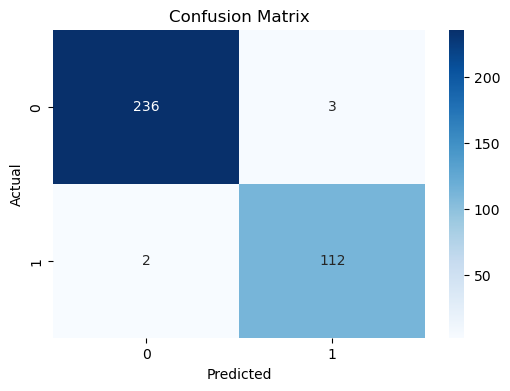

In [9]:
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Evaluate Accuracy, Precision, Recall and F1 Score on Validation Data

In [10]:
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1 Score: {f1:}")

Accuracy: 0.9858356940509915
Precision: 0.9739130434782609
Recall: 0.9824561403508771
F1 Score: 0.9781659388646288
